In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.metrics import accuracy_score 

In [ ]:
df = pd.read_csv(r"/content/collegePlace.csv")

In [ ]:
df.shape

(2966, 8)

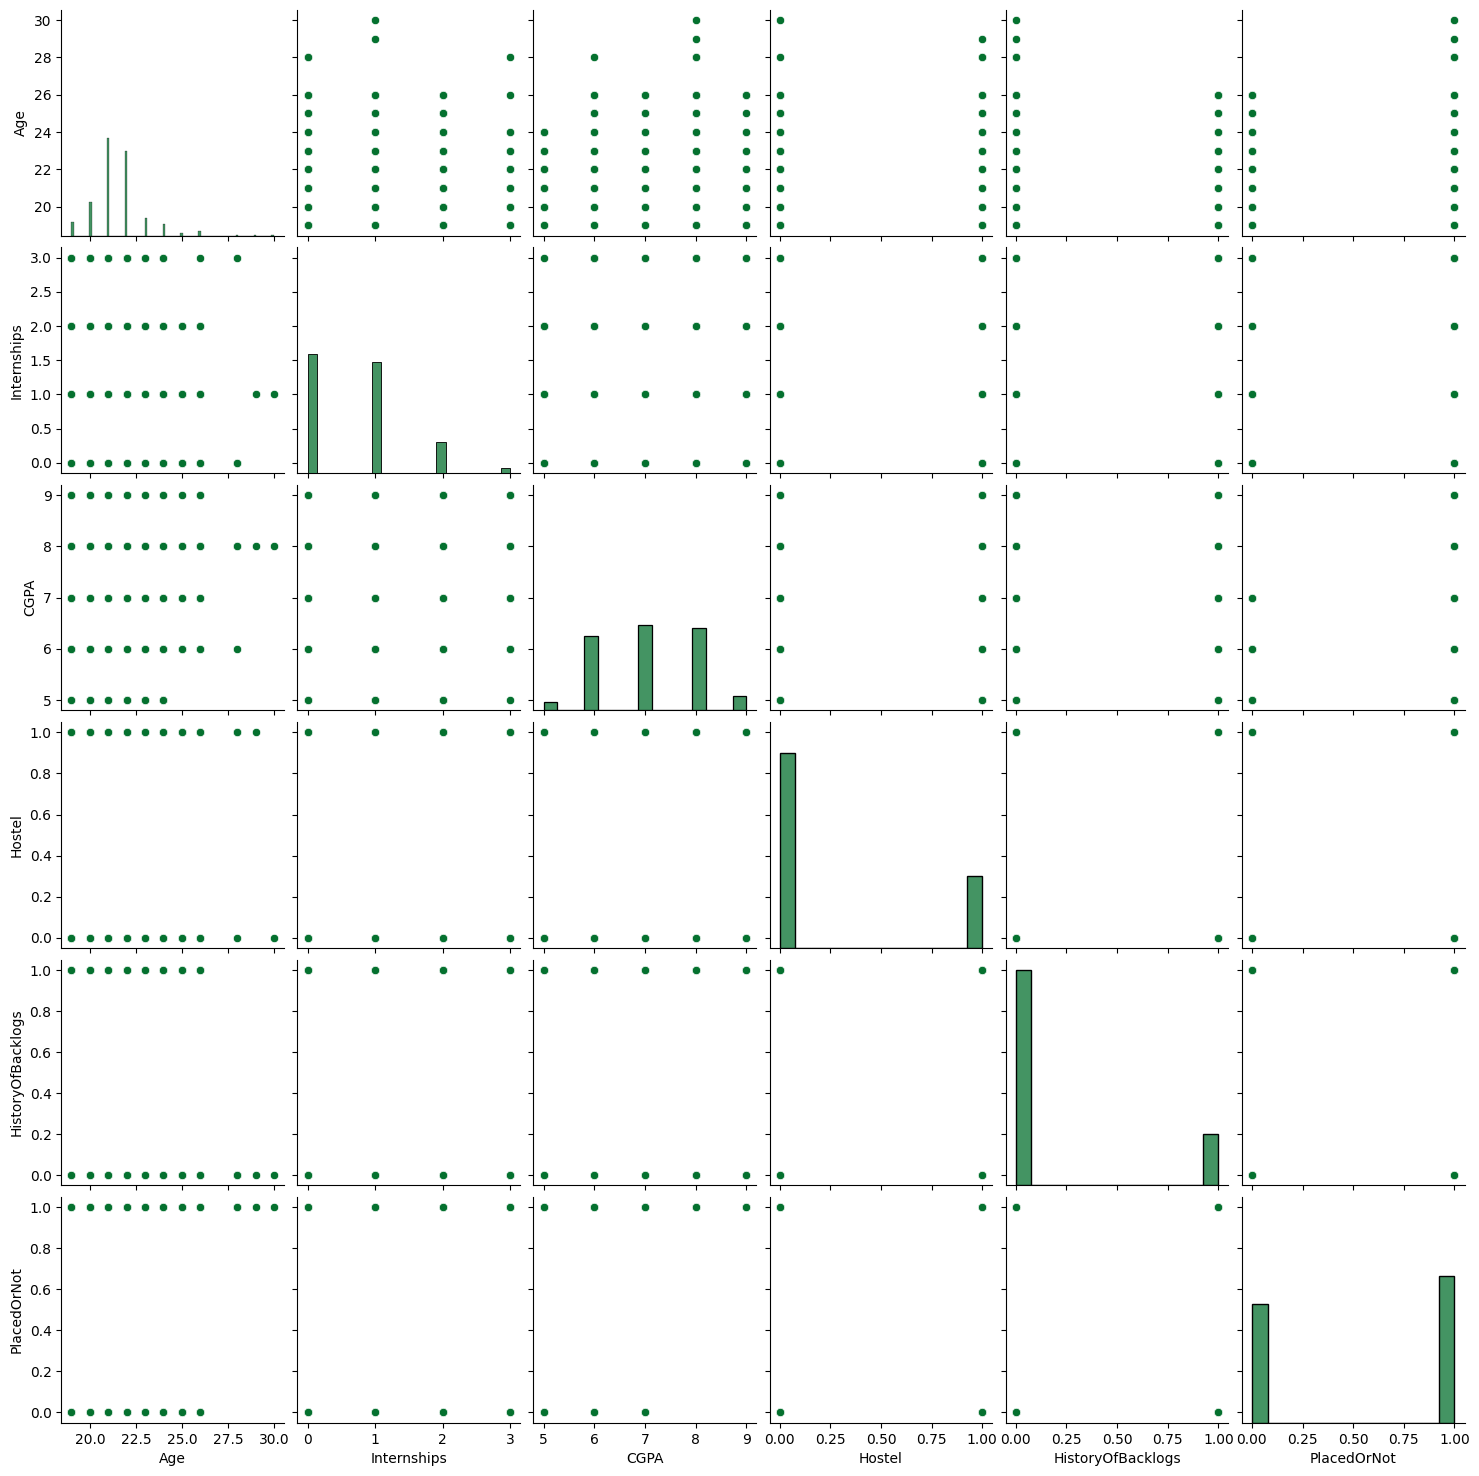

In [ ]:
sns.pairplot(df)

In [ ]:
corr = df.corr()

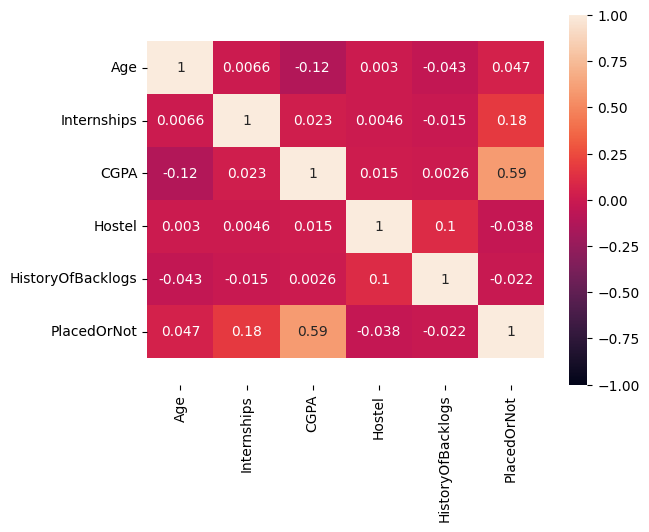

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
Age,1.000000,0.006552,-0.119787,0.003042,-0.042586,0.046943
Internships,0.006552,1.000000,0.023496,0.004617,-0.015118,0.179334
CGPA,-0.119787,0.023496,1.000000,0.014991,0.002576,0.588648
Hostel,0.003042,0.004617,0.014991,1.000000,0.103506,-0.038182
HistoryOfBacklogs,-0.042586,-0.015118,0.002576,0.103506,1.000000,-0.022337
PlacedOrNot,0.046943,0.179334,0.588648,-0.038182,-0.022337,1.000000


In [ ]:
ax = sns.heatmap(corr, vmin = -1, vmax = 1, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()
corr

<ipython-input-30-f92659182652>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CGPA'],color='r')


<Axes: xlabel='CGPA', ylabel='Density'>

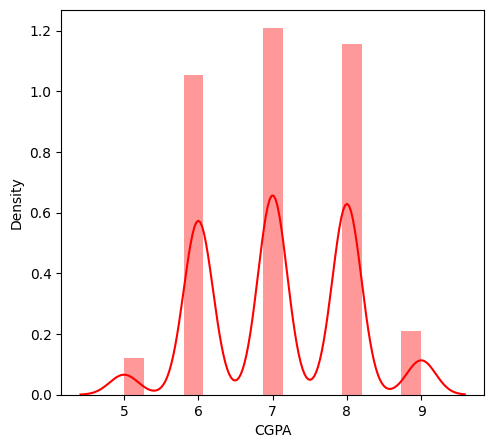

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df['CGPA'],color='r')

<ipython-input-31-f92659182652>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CGPA'],color='r')


<Axes: xlabel='CGPA', ylabel='Density'>

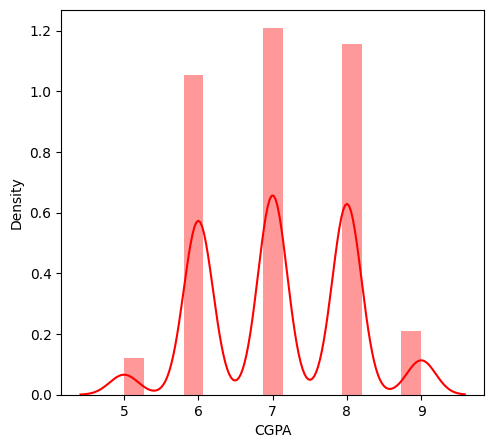

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df['CGPA'],color='r')

<Axes: xlabel='PlacedOrNot', ylabel='count'>

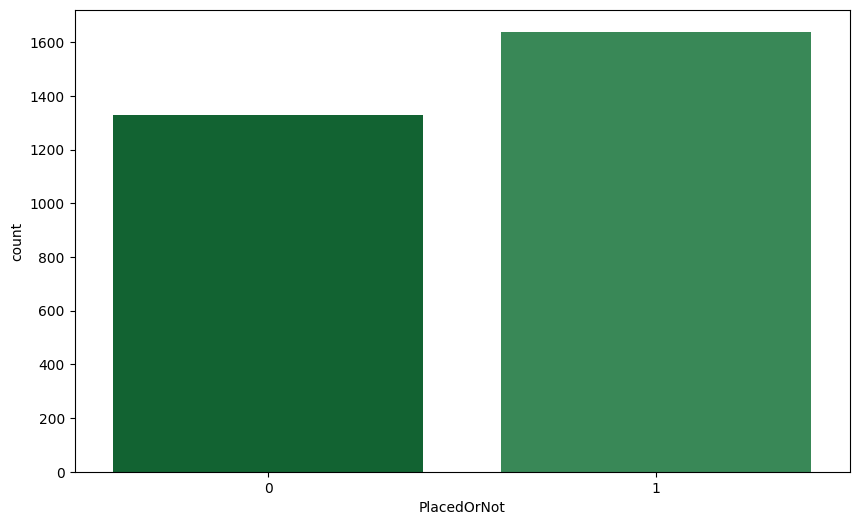

In [ ]:
plt.figure(figsize = (10,6), dpi = 100)
color_palette = sns.color_palette("BuGn_r")
sns.set_palette(color_palette)
sns.countplot(x = "PlacedOrNot", data = df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [ ]:
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [ ]:
df.describe()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


In [ ]:
df['Gender'].value_counts()

Male      2475
Female     491
Name: Gender, dtype: int64

In [ ]:
df['Stream'].value_counts()

Computer Science                 776
Information Technology           691
Electronics And Communication    424
Mechanical                       424
Electrical                       334
Civil                            317
Name: Stream, dtype: int64

In [ ]:
df = df.replace(['Male'], [0])
df = df.replace(['Female'], [1])

In [ ]:
df = df.replace(['Computer Science','Information Technology','Electronic And Communication','Mechanical','Electrical','Civil'],[0,1,2,3,4,5])

In [ ]:
df

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,0,Electronics And Communication,1,8,1,1,1
1,21,1,0,0,7,1,1,1
2,22,1,1,1,6,0,0,1
3,21,0,1,0,8,0,1,1
4,22,0,3,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,0,1,0,7,0,0,0
2962,23,0,3,1,7,1,0,0
2963,22,0,1,1,7,0,0,0
2964,22,0,0,1,7,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   int64 
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 185.5+ KB


In [ ]:
def transformationplot(feature):
  plt.figure(figsize=(12,5))
  plt.subplot(1,2,1)
  sns.distplot(feature)

<ipython-input-42-4e023cd5df85>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature)


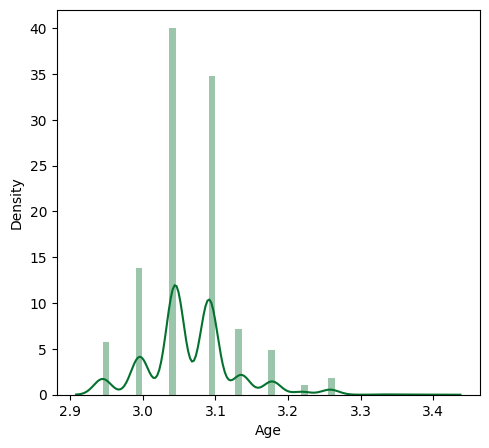

In [ ]:
transformationplot(np.log(df['Age']))

In [ ]:
df = df.drop(['Stream'], axis=1)

In [ ]:
df

,Age,Gender,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,0,1,8,1,1,1
1,21,1,0,7,1,1,1
2,22,1,1,6,0,0,1
3,21,0,0,8,0,1,1
4,22,0,0,8,1,0,1
...,...,...,...,...,...,...,...
2961,23,0,0,7,0,0,0
2962,23,0,1,7,1,0,0
2963,22,0,1,7,0,0,0
2964,22,0,1,7,0,0,0


In [ ]:
X = df.drop(columns = 'PlacedOrNot', axis=1)
Y = df['PlacedOrNot']

In [ ]:
import joblib
joblib.dump(X,"placement")

['placement']

In [ ]:
print(X)

      Age  Gender  Internships  CGPA  Hostel  HistoryOfBacklogs
0      22       0            1     8       1                  1
1      21       1            0     7       1                  1
2      22       1            1     6       0                  0
3      21       0            0     8       0                  1
4      22       0            0     8       1                  0
...   ...     ...          ...   ...     ...                ...
2961   23       0            0     7       0                  0
2962   23       0            1     7       1                  0
2963   22       0            1     7       0                  0
2964   22       0            1     7       0                  0
2965   23       0            0     8       0                  0

[2966 rows x 6 columns]


In [ ]:
print(Y)

0       1
1       1
2       1
3       1
4       1
       ..
2961    0
2962    0
2963    0
2964    0
2965    1
Name: PlacedOrNot, Length: 2966, dtype: int64


In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
standardized_data = scaler.transform(X)

In [ ]:

print(standardized_data)

[[ 0.38813058 -0.44540301  0.40044544  0.95719068  1.64826939  2.05024603]
 [-0.36675158  2.24515772 -0.95077319 -0.07631043  1.64826939  2.05024603]
 [ 0.38813058  2.24515772  0.40044544 -1.10981154 -0.60669694 -0.48774634]
 ...
 [ 0.38813058 -0.44540301  0.40044544 -0.07631043 -0.60669694 -0.48774634]
 [ 0.38813058 -0.44540301  0.40044544 -0.07631043 -0.60669694 -0.48774634]
 [ 1.14301273 -0.44540301 -0.95077319  0.95719068 -0.60669694 -0.48774634]]


In [ ]:
X = standardized_data
Y = df['PlacedOrNot']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)


In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(2966, 6) (2372, 6) (594, 6)


In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [ ]:
X_test_prediction = classifier.predict(X_test)
y_pred= accuracy_score(X_test_prediction, Y_test)
y_pred

0.7744107744107744

In [ ]:
X_test

array([[-0.36675158,  2.24515772,  1.75166407, -0.07631043, -0.60669694,
        -0.48774634],
       [ 0.38813058, -0.44540301, -0.95077319, -0.07631043,  1.64826939,
        -0.48774634],
       [ 1.89789488, -0.44540301,  0.40044544, -0.07631043, -0.60669694,
        -0.48774634],
       ...,
       [-1.12163373, -0.44540301,  0.40044544,  1.99069179,  1.64826939,
        -0.48774634],
       [ 0.38813058, -0.44540301,  0.40044544, -1.10981154, -0.60669694,
        -0.48774634],
       [ 0.38813058,  2.24515772,  0.40044544,  0.95719068, -0.60669694,
        -0.48774634]])

In [ ]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.769814502529511


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [ ]:
best_k = {"Regular":0}
best_score = {"Regular":0}
for k in range(3,50,2):
  knn_temp = KNeighborsClassifier(n_neighbors=k)
  knn_temp.fit(X_train, Y_train)
  knn_temp_pred = knn_temp.predict(X_test)
  score = metrics.accuracy_score(Y_test, knn_temp_pred) * 100
  if score >= best_score["Regular"] and score < 100:
    best_score["Regular"] = score
    best_k["Regular"] = k

In [ ]:
print("---Results---\nK: {}\nScore: {}".format(best_k, best_score))
knn =  KNeighborsClassifier(n_neighbors=best_k["Regular"])
knn.fit(X_train, Y_train)
knn_pred = knn.predict(X_test)
testd = accuracy_score(knn_pred, Y_test)

---Results---
K: {'Regular': 15}
Score: {'Regular': 87.20538720538721}


In [ ]:
knn_pred

array([1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
print('Accuracy score of the test data using KNN : ', testd)

Accuracy score of the test data using KNN :  0.8720538720538721


In [ ]:
knn_pred_1 = knn.predict(X_train)
traind = accuracy_score(knn_pred_1, Y_train)
traind

0.8663575042158516

In [ ]:
knn_pred_1

array([1, 0, 0, ..., 1, 1, 0])

In [ ]:
X_train.shape

(2372, 6)

In [ ]:
Y_train.shape

(2372,)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers

In [ ]:
classifier = Sequential()
classifier.add(keras.layers.Dense(6,activation = 'relu', input_dim = 6))
classifier.add(keras.layers.Dropout(0.50))
classifier.add(keras.layers.Dense(6,activation = 'relu'))
classifier.add(keras.layers.Dropout(0.50))
classifier.add(keras.layers.Dense(6,activation = 'sigmoid'))

In [ ]:
loss_1 = tf. keras.losses.BinaryCrossentropy()
classifier.compile(optimizer = 'Adam', loss = loss_1 , metrics = ['Accracy'])

In [ ]:
import pickle
pickle.dump(knn,open("placement.pk1",'wb'))
model = pickle.load(open('placement.pk1', 'rb'))